##Importa las herramientas necesarias (Pandas para datos, Matplotlib/Seaborn para gráficos) y carga el archivo "sucio" original.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (12, 6)

try:
    df = pd.read_csv('iot_sensor_corrupted_dataset.csv')
    print("=== 1. Carga Exitosa ===")
    print(df.head())
    print("\n=== Información Inicial ===")
    print(df.info())
except Exception as e:
    print(f"Error al cargar: {e}")

=== 1. Carga Exitosa ===
             timestamp device_id  temperature_C          humidity_% status
0  2030-05-15 00:00:00  ESP32_A2      26.490142  47.391160456649544     OK
1  2023-01-01 00:30:00  ESP32_A2      24.585207   69.17861947054776     OK
2  2023-01-01 01:00:00  ESP32_B1      26.943066               -10.0     OK
3  2023-01-01 01:30:00  ESP32_B1      29.569090   70.32465260551147     OK
4  2023-01-01 02:00:00  ESP32_A1            NaN   44.80630034045987     OK

=== Información Inicial ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      260 non-null    object 
 1   device_id      252 non-null    object 
 2   temperature_C  247 non-null    float64
 3   humidity_%     253 non-null    object 
 4   status         260 non-null    object 
dtypes: float64(1), object(4)
memory usage: 10.3+ KB
None


##Elimina duplicados: Borra filas repetidas. Corrige fechas: Detecta y borra registros del futuro (año 2030). Limpia valores: Convierte texto a números y borra datos imposibles (999°C o -10% humedad). Rellena huecos: Usa el promedio para llenar datos faltantes (fillna) sin perder la fila completa.

In [19]:
print("=== 2. Procesando Limpieza ===")

filas_iniciales = len(df)
df.drop_duplicates(inplace=True)
print(f"Duplicados eliminados: {filas_iniciales - len(df)}")


df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')


fecha_actual = datetime.datetime.now()
anomalias_fecha = df[df['timestamp'] > fecha_actual]
print(f"Registros con fecha futura errónea eliminados: {len(anomalias_fecha)}")
df = df[df['timestamp'] <= fecha_actual]


df['temperature_C'] = pd.to_numeric(df['temperature_C'], errors='coerce')
df['humidity_%'] = pd.to_numeric(df['humidity_%'], errors='coerce')

df.loc[df['temperature_C'] > 100, 'temperature_C'] = np.nan
df.loc[(df['humidity_%'] < 0) | (df['humidity_%'] > 100), 'humidity_%'] = np.nan

df['status'] = df['status'].str.upper().str.strip()

df.dropna(subset=['timestamp', 'device_id'], inplace=True)


df['temperature_C'].fillna(df['temperature_C'].mean(), inplace=True)
df['humidity_%'].fillna(df['humidity_%'].mean(), inplace=True)

print("\n=== Dataset Limpio ===")
print(df.info())


=== 2. Procesando Limpieza ===
Duplicados eliminados: 8
Registros con fecha futura errónea eliminados: 10

=== Dataset Limpio ===
<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 1 to 257
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      235 non-null    datetime64[ns]
 1   device_id      235 non-null    object        
 2   temperature_C  235 non-null    float64       
 3   humidity_%     235 non-null    float64       
 4   status         235 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 11.0+ KB
None


###Calcula los números finales. Usa describe() para darte el promedio, mínimo y máximo reales (ya limpios). También cuenta cuántos sensores dieron "FAIL".

In [20]:
print("=== 3. Estadísticas Descriptivas (Datos Validados) ===")
print(df.describe())

print("\n=== Conteo de Estados del Sistema ===")
conteo_status = df['status'].value_counts()
print(conteo_status)

print("\n=== Promedios por Dispositivo ===")
print(df.groupby('device_id')[['temperature_C', 'humidity_%']].mean())

=== 3. Estadísticas Descriptivas (Datos Validados) ===
                           timestamp  temperature_C  humidity_%
count                            235     235.000000  235.000000
mean   2023-01-03 14:57:11.489361920      24.959792   60.100083
min              2023-01-01 00:30:00      17.140765   36.980788
25%              2023-01-02 08:15:00      23.042606   54.001952
50%              2023-01-03 15:00:00      24.959792   60.100083
75%              2023-01-04 22:45:00      26.545124   66.046619
max              2023-01-06 04:30:00      36.558194   90.788808
std                              NaN       2.802857    9.227969

=== Conteo de Estados del Sistema ===
status
OK      180
FAIL     55
Name: count, dtype: int64

=== Promedios por Dispositivo ===
                temperature_C  humidity_%
device_id                                
ESP32_A1            24.764563   58.926980
ESP32_A2            25.307132   60.828594
ESP32_B1            24.812143   60.717933
unknown_device      25.09761

In [21]:
print("=== 3. Estadísticas Descriptivas (Datos Validados) ===")
print(df.describe())

print("\n=== Conteo de Estados del Sistema ===")
conteo_status = df['status'].value_counts()
print(conteo_status)

print("\n=== Promedios por Dispositivo ===")
print(df.groupby('device_id')[['temperature_C', 'humidity_%']].mean())

=== 3. Estadísticas Descriptivas (Datos Validados) ===
                           timestamp  temperature_C  humidity_%
count                            235     235.000000  235.000000
mean   2023-01-03 14:57:11.489361920      24.959792   60.100083
min              2023-01-01 00:30:00      17.140765   36.980788
25%              2023-01-02 08:15:00      23.042606   54.001952
50%              2023-01-03 15:00:00      24.959792   60.100083
75%              2023-01-04 22:45:00      26.545124   66.046619
max              2023-01-06 04:30:00      36.558194   90.788808
std                              NaN       2.802857    9.227969

=== Conteo de Estados del Sistema ===
status
OK      180
FAIL     55
Name: count, dtype: int64

=== Promedios por Dispositivo ===
                temperature_C  humidity_%
device_id                                
ESP32_A1            24.764563   58.926980
ESP32_A2            25.307132   60.828594
ESP32_B1            24.812143   60.717933
unknown_device      25.09761

=== 4. Visualización Básica ===


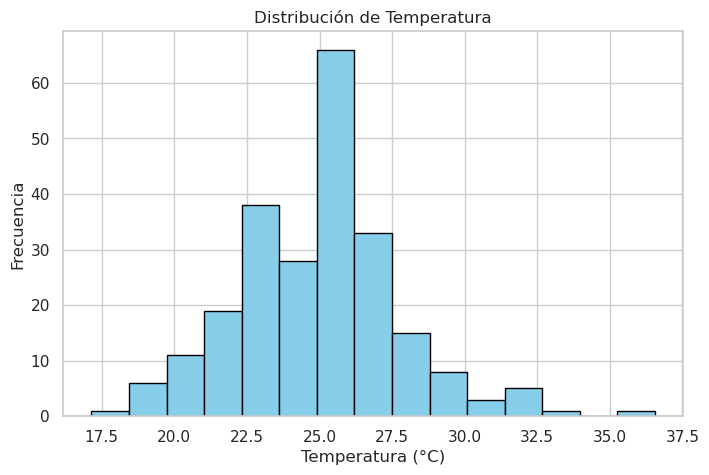

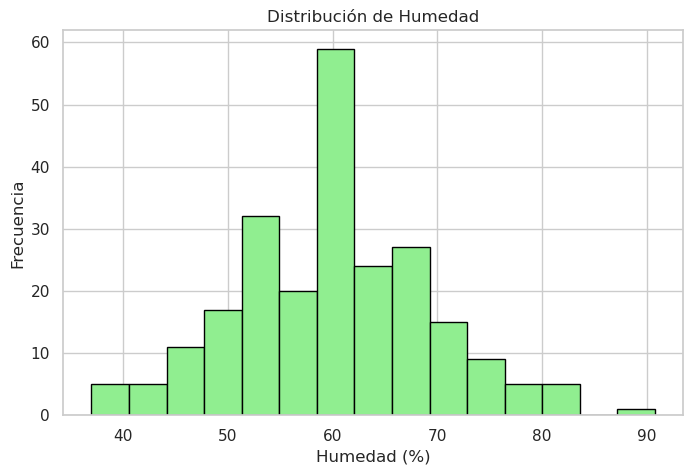

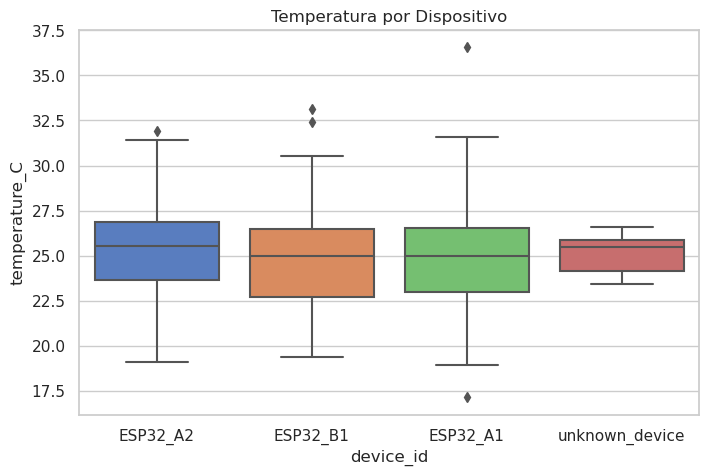

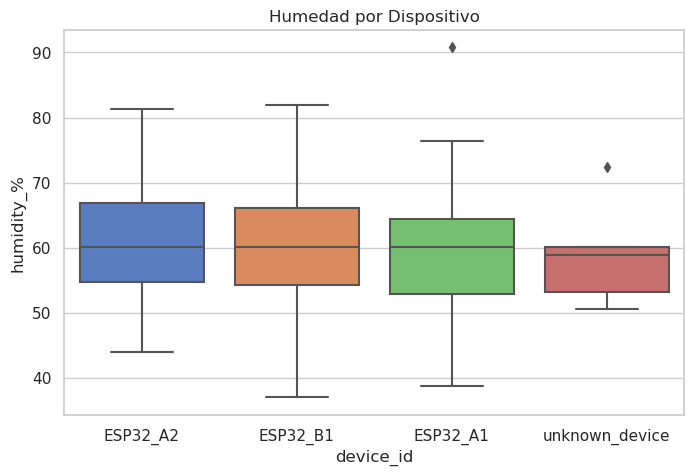

In [25]:
print("=== 4. Visualización Básica ===")

# --- 1. Histograma de Temperatura ---
plt.figure(figsize=(8, 5))
# Usamos plt.hist que es la función básica para histogramas
plt.hist(df['temperature_C'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribución de Temperatura')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')
plt.show()

# --- 2. Histograma de Humedad ---
plt.figure(figsize=(8, 5))
plt.hist(df['humidity_%'], bins=15, color='lightgreen', edgecolor='black')
plt.title('Distribución de Humedad')
plt.xlabel('Humedad (%)')
plt.ylabel('Frecuencia')
plt.show()

# --- 3. Boxplot de Temperatura por Dispositivo ---
plt.figure(figsize=(8, 5))
# El boxplot básico de seaborn es muy efectivo y simple de leer
sns.boxplot(x='device_id', y='temperature_C', data=df)
plt.title('Temperatura por Dispositivo')
plt.show()

# --- 4. Boxplot de Humedad por Dispositivo ---
plt.figure(figsize=(8, 5))
sns.boxplot(x='device_id', y='humidity_%', data=df)
plt.title('Humedad por Dispositivo')
plt.show()